In [1]:
#!pip uninstall umap
#!pip install umap-learn
#!pip install scikit-lear

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#import umap.umap_ as umap

# Instance Space Analysis

Tools:
1. UMAP (needs python 3.11)
1. TSNE
1. https://matilda.unimelb.edu.au/matilda/our-methodology

In [7]:
%run Util.ipynb

In [8]:
def scale_data(data):
    """
    :return initial data, standard scaled data, minmax scaled data
    """
    _data = data.drop(columns=data.columns[0]) #drop column with problem name
    X = _data.to_numpy(dtype='float64')
    
    scalerStandard = StandardScaler().fit(X)
    X_std = scalerStandard.transform(X)

    scalerMinMax = MinMaxScaler().fit(X)
    X_MinMax = scalerMinMax.transform(X)
    return X, X_std, X_MinMax

In [9]:
INSTANCES_CHARACTERISTICS_PATH='../datasets/results/instances_characteristics/februarie2025-v2/'

In [10]:
def read_data_for_embeding(data_representation, instances_characteristics_dir, add_statistics=False, instance_class=InstanceClass.PROBLEM):
    """
    Read instances characteristics files
    :param data_representation: the type of graph representation
    :param instances_characteristics_dir: the directory where the instances characeristics are stored
    :param add_statistics:
    :param class_type: probrem, bestAlg
    """
    data, data_labels = read_info_graph(data_representation, instances_characteristics_dir, instance_class=instance_class)
    if add_statistics:
        data_statistics, data_statistic_labels = read_info_graph("statistics", instances_characteristics_dir, instance_class=instance_class)
        data = add_info_from_statistics_to_graph(data_statistics, data)


    #remove instance name column
    data = data.drop(columns=[data.columns[0]])
    df = pd.DataFrame(data)
    
    #Drop columns with Null values
    cols = df.columns[df.isna().any()].tolist()
    
    if  cols:
        print("Columns with null values", cols)
    df = df.drop(columns=cols)
    
    df = df.to_numpy(dtype='float64')

    return df, data_labels
    

# TSNE

In [11]:
def TSNE_representation(data_representation, title, instance_class, add_statistics=False, n_components=2, perplexity=3):
    
    instances_data, instances_class = read_data_for_embeding(data_representation, INSTANCES_CHARACTERISTICS_PATH, add_statistics, instance_class=instance_class)
   
    X = instances_data
    # embeddingTSNE = TSNE(n_components=n_components, learning_rate='auto',init='pca', perplexity=perplexity)
    # embeddingTSNE = embeddingTSNE.fit_transform(X)
    
    scalerStd = StandardScaler().fit(X)
    X_std = scalerStd.transform(X)
    embeddingTSNE_std = TSNE(n_components=n_components, learning_rate='auto',init='pca', perplexity=perplexity)
    embeddingTSNE_std = embeddingTSNE_std.fit_transform(X_std)

    scalerMinMax = MinMaxScaler().fit(X)
    X_minmax = scalerMinMax.transform(X)
    embeddingTSNE_minmax = TSNE(n_components=n_components, learning_rate='auto',init='pca', perplexity=perplexity)
    embeddingTSNE_minmax = embeddingTSNE_minmax.fit_transform(X_minmax)

    plt.style.use('ggplot')
    palette = sns.color_palette("tab10", as_cmap=True, n_colors=len(instances_class)+1)

    fig, ax = plt.subplots(2)
    
    fig.suptitle(title + " std/minMax")

    data_names = instances_class.drop_duplicates().reset_index(drop=True)
    instances_class['label_encoded'] = pd.factorize(instances_class)[0]

    scatter = ax[0].scatter(embeddingTSNE_std[:, 0], embeddingTSNE_std[:, 1], c = instances_class['label_encoded'], cmap=palette)
    
    ax[0].set(xlabel='d1', ylabel='d2')
    ax[0].set_title(f'{title} standard scaler')
    ax[0].legend(scatter.legend_elements()[0], data_names,
          title="Problem",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
    scatter = ax[1].scatter(embeddingTSNE_minmax[:, 0], embeddingTSNE_minmax[:, 1], c = instances_class['label_encoded'], cmap=palette)
    
    ax[1].set(xlabel='d1', ylabel='d2')
    ax[1].set_title(f'{title} min-max scaler')
    ax[1].legend(scatter.legend_elements()[0], data_names,
          title="Problem",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


0      asp-deep
1      asp-deep
2      asp-deep
3      asp-deep
4      asp-deep
         ...   
323        yfjs
324        yfjs
325        yfjs
326        yfjs
327        yfjs
Name: 0, Length: 328, dtype: object


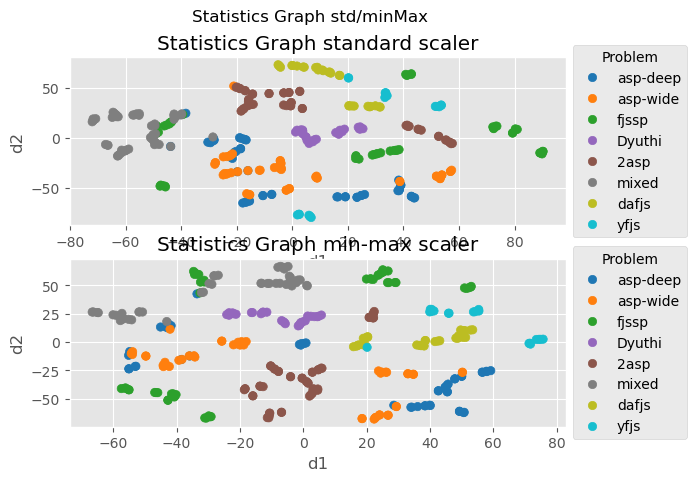

In [12]:
TSNE_representation("statistics", "Statistics Graph", InstanceClass.PROBLEM)

In [13]:
TSNE_representation("operations", "Operations Graph", InstanceClass.PROBLEM)

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/results/instances_characteristics/februarie2025-v2//operations/bom_info_graph_deep.csv'

0      asp-deep
1      asp-deep
2      asp-deep
3      asp-deep
4      asp-deep
         ...   
323        yfjs
324        yfjs
325        yfjs
326        yfjs
327        yfjs
Name: 0, Length: 328, dtype: object
0      asp-deep
1      asp-deep
2      asp-deep
3      asp-deep
4      asp-deep
         ...   
323        yfjs
324        yfjs
325        yfjs
326        yfjs
327        yfjs
Name: 0, Length: 328, dtype: object
0      asp-deep
1      asp-deep
2      asp-deep
3      asp-deep
4      asp-deep
         ...   
323        yfjs
324        yfjs
325        yfjs
326        yfjs
327        yfjs
Name: 0, Length: 328, dtype: object
0      asp-deep
1      asp-deep
2      asp-deep
3      asp-deep
4      asp-deep
         ...   
323        yfjs
324        yfjs
325        yfjs
326        yfjs
327        yfjs
Name: 0, Length: 328, dtype: object
0      asp-deep
1      asp-deep
2      asp-deep
3      asp-deep
4      asp-deep
         ...   
323        yfjs
324        yfjs
325        yfjs
326     

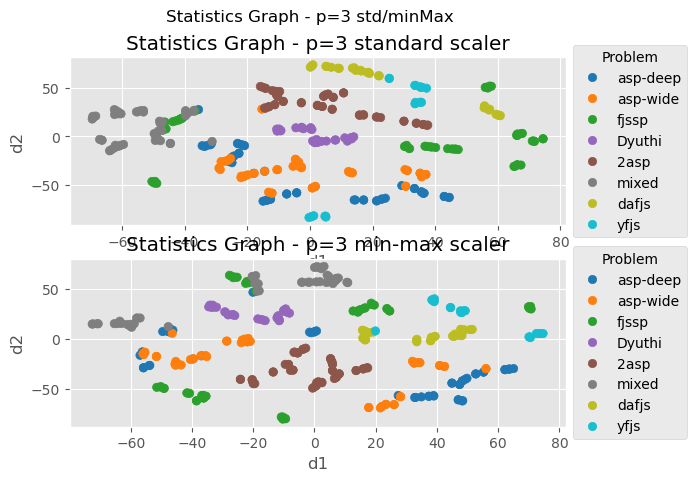

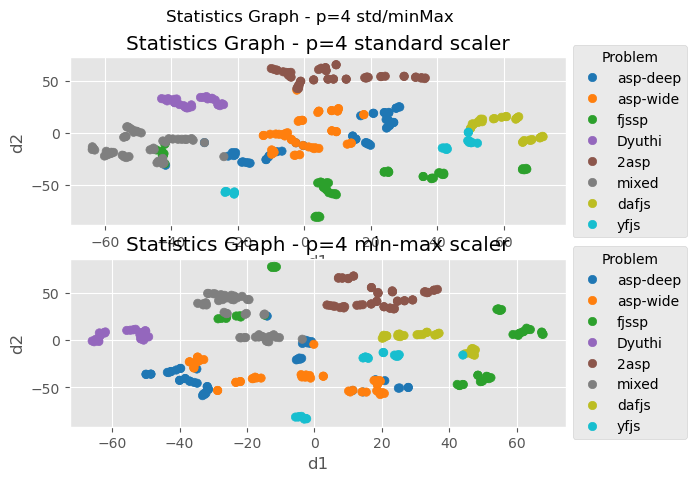

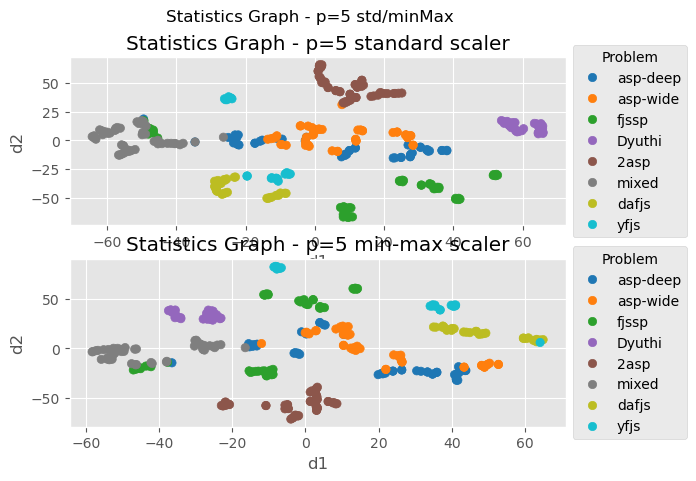

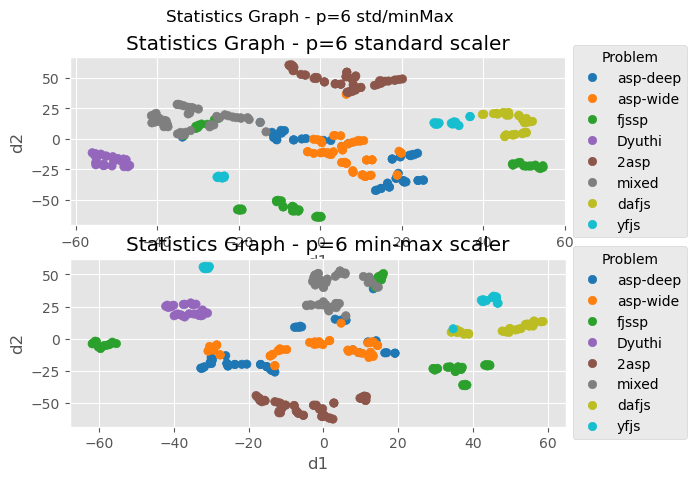

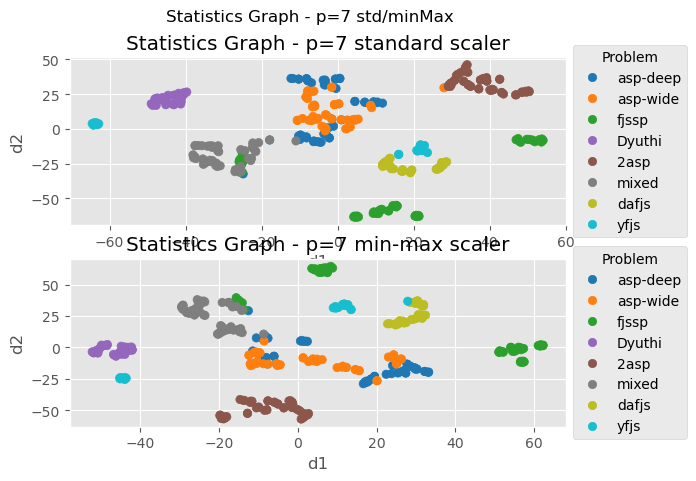

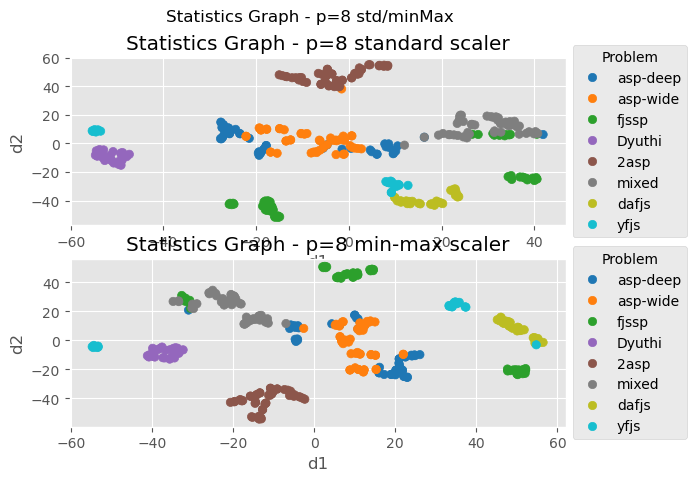

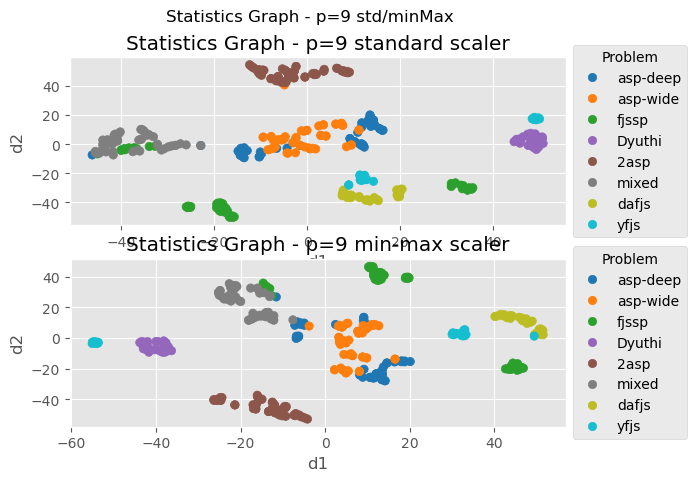

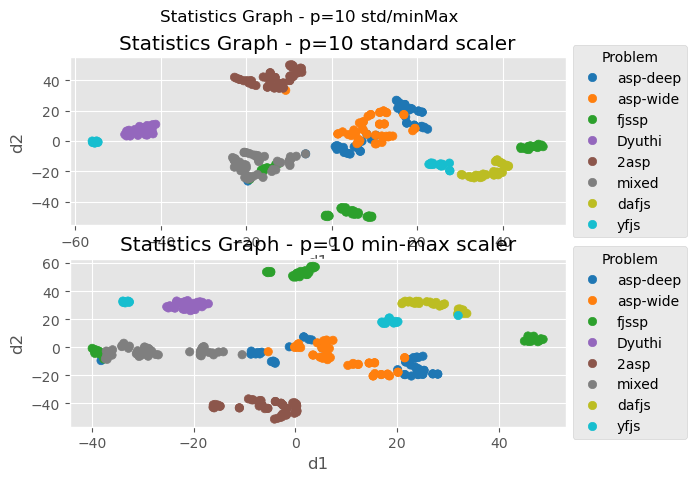

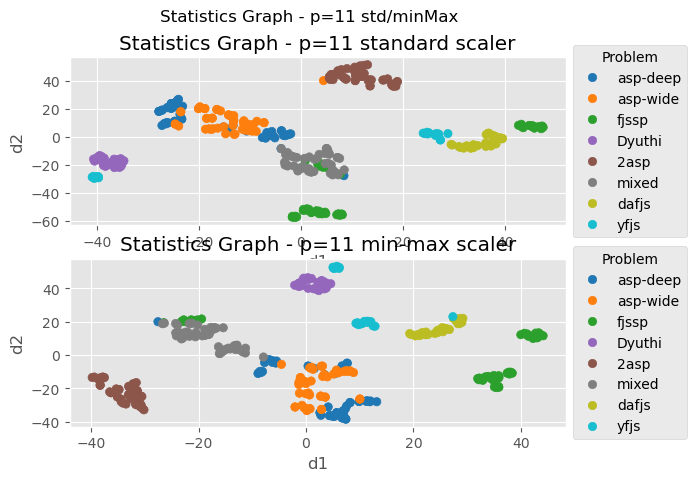

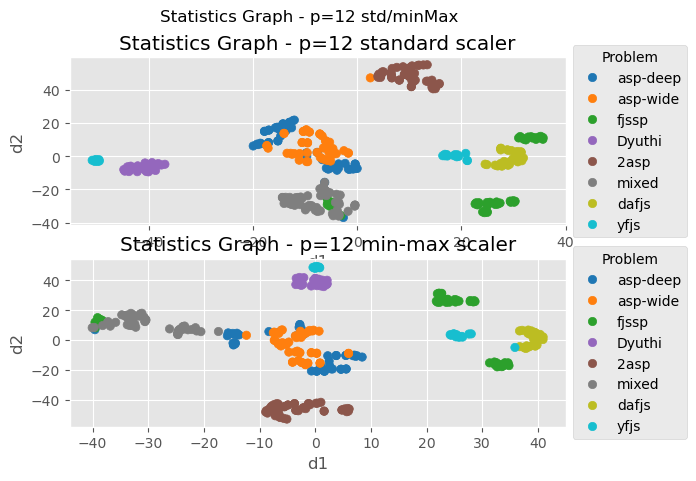

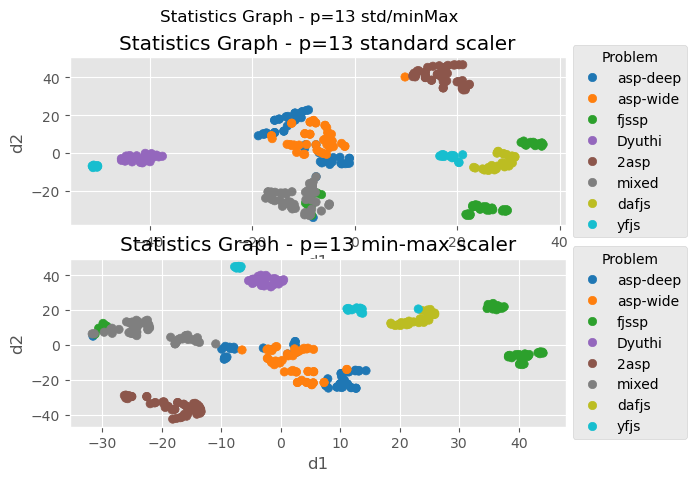

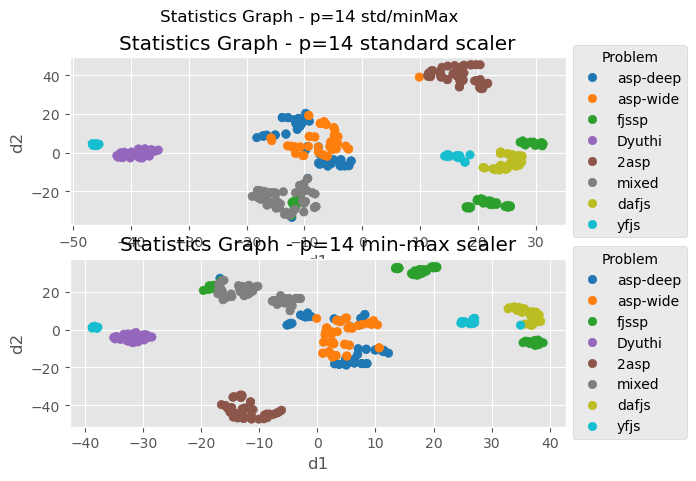

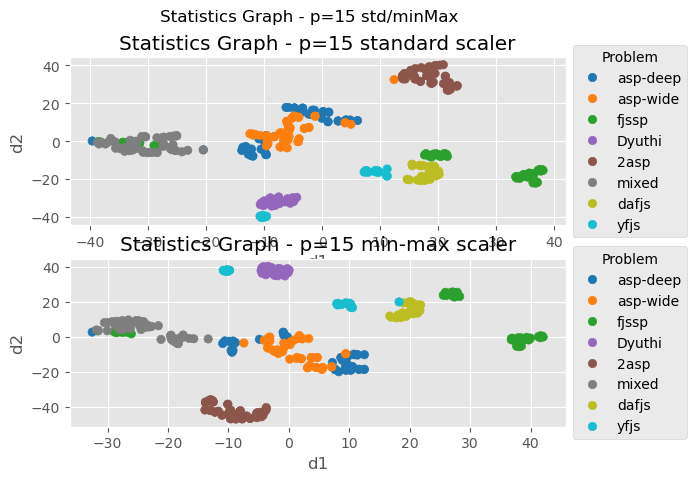

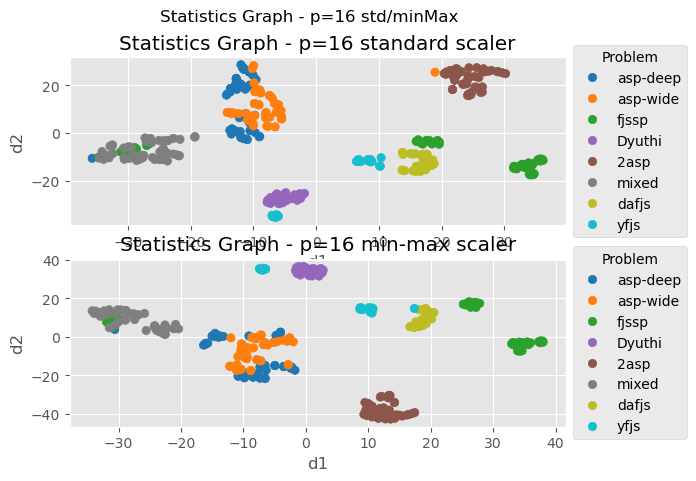

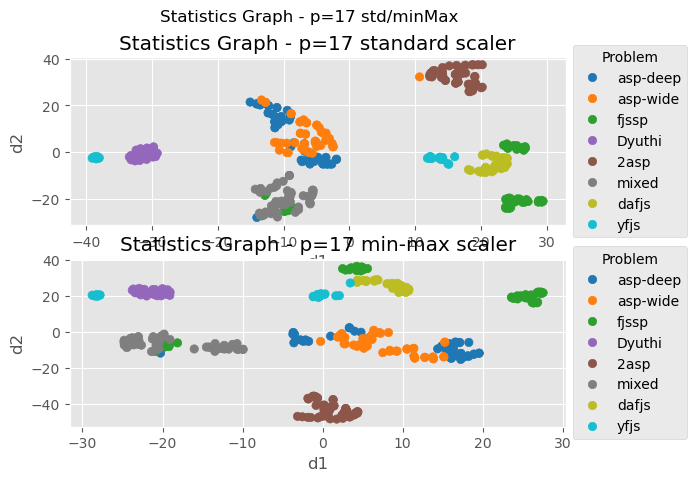

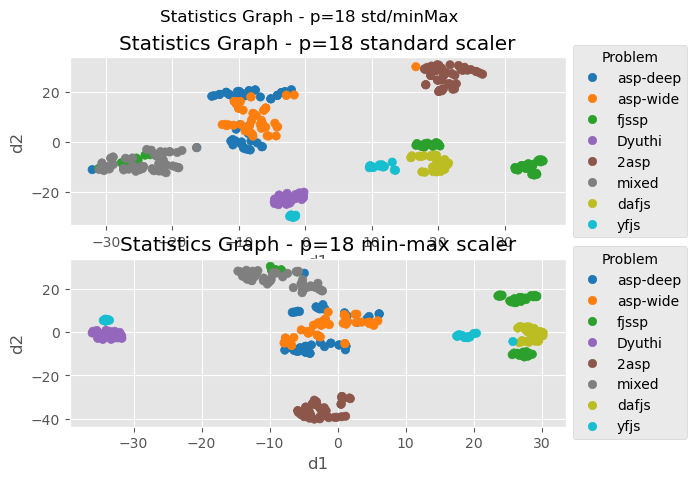

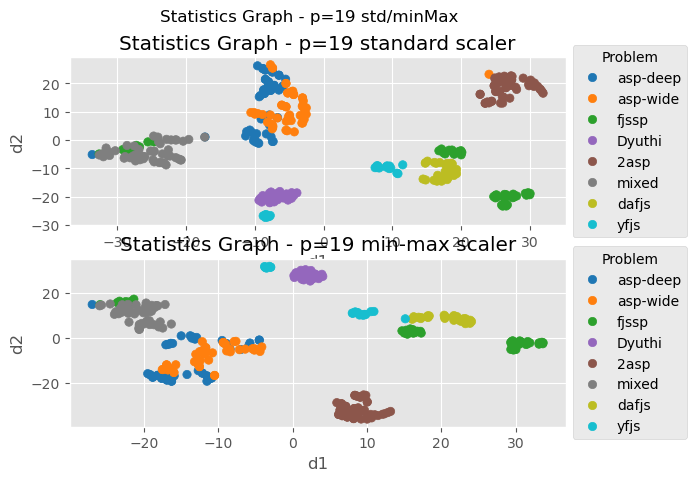

In [14]:
for p in range(3,20):
    TSNE_representation("statistics", f"Statistics Graph - p={p}", InstanceClass.PROBLEM, perplexity=p)

# UMAP

In [12]:
def UMAP_representation(data_representation, title, instance_class, add_statistics=False, n_components=2, n_neighbors=5):

    instances_data, instances_class = read_data_for_embeding(data_representation, INSTANCES_CHARACTERISTICS_PATH, add_statistics, instance_class=instance_class)
   
    X = instances_data
    embeddingUMAP = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.1, n_components=n_components, metric='cosine',random_state=42).fit_transform(X)

    # embeddingTSNE = TSNE(n_components=n_components, learning_rate='auto',init='pca', perplexity=perplexity)
    # embeddingTSNE = embeddingTSNE.fit_transform(X)
    
    scalerStd = StandardScaler().fit(X)
    X_std = scalerStd.transform(X)
    embeddingUMAP_std = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.1, n_components=n_components, metric='cosine',random_state=42).fit_transform(X_std)


    scalerMinMax = MinMaxScaler().fit(X)
    X_minmax = scalerMinMax.transform(X)
    embeddingUMAP_minmax = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.1, n_components=n_components, metric='cosine',random_state=42).fit_transform(X_minmax)

    plt.style.use('ggplot')
    palette = sns.color_palette("tab10", as_cmap=True, n_colors=len(instances_class)+1)

    fig, ax = plt.subplots(2)
    
    fig.suptitle(title + " std/minMax")

    data_names = instances_class.drop_duplicates().reset_index(drop=True)
    instances_class['label_encoded'] = pd.factorize(instances_class)[0]

    scatter = ax[0].scatter(*embeddingUMAP_std.T, c = instances_class['label_encoded'], cmap=palette, alpha=0.9)
    ax[0].set(xlabel='d1', ylabel='d2')
    ax[0].set_title(f'{title} standard scaler')
    ax[0].legend(scatter.legend_elements()[0], data_names,
          title="Problem",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
    scatter = ax[1].scatter(*embeddingUMAP_minmax.T, c = instances_class['label_encoded'], cmap=palette, alpha=0.9)
    
    ax[1].set(xlabel='d1', ylabel='d2')
    ax[1].set_title(f'{title} min-max scaler')
    ax[1].legend(scatter.legend_elements()[0], data_names,
          title="Problem",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

In [14]:
UMAP_representation("statistics", "Statistics Graph", InstanceClass.PROBLEM)

NameError: name 'InstanceClass' is not defined

# Matilda
Prepare data for Matilda

https://github.com/andremun/pyInstanceSpace
https://cs.paperswithcode.com/paper/instancespace-a-python-package-for-insightful
uses python 3.12 ai nevoie de alt env
Instances
feature_
algo_

In [62]:
#instances_data, instances_class = read_data_for_embeding("statistics", INSTANCES_CHARACTERISTICS_PATH, add_statistics=False, instance_class=InstanceClass.PROBLEM)
data, data_labels = read_info_graph("statistics", INSTANCES_CHARACTERISTICS_PATH, instance_class=InstanceClass.PROBLEM)

data = pd.read_csv("../datasets/results/features/for_test/features_FS_K_standard.csv")
                   
d={}
for column in data.columns:
    if column == 'problem':
        d[column] = 'Instances'
    else:
        d[column]= f'feature_{column}'
data = data.rename(columns=d)
data

0      asp-deep
1      asp-deep
2      asp-deep
3      asp-deep
4      asp-deep
         ...   
323        yfjs
324        yfjs
325        yfjs
326        yfjs
327        yfjs
Name: 0, Length: 328, dtype: object


,feature_depth_min,feature_depth_stdev,feature_depth_q50,feature_depth_gini,feature_operation-children_min,feature_operation-children_max,feature_operation-children_mean,feature_operation-children_stdev,feature_operation-children_q50,feature_operation-children_gini,...,feature_operation_mean_acctual_execution_time_gini,feature_operation_stdev_acctual_execution_time_stdev,feature_operation_stdev_acctual_execution_time_q50,feature_operation_stdev_acctual_execution_time_gini,feature_machine_mean_acctual_execution_time_q25,feature_machine_stev_acctual_execution_time_min,feature_machine_stev_acctual_execution_time_stdev,feature_machine_stev_acctual_execution_time_q50,feature_machine_stev_acctual_execution_time_gini,Instances
0,11,0.000000,11.0,2.583792e-17,1,2,1.100000,0.303822,1.0,0.081818,...,0.218648,0.000000,0.000000,-2.928015e-17,4565.735294,1260.760741,572.996164,2147.432365,0.141831,bom_deep_10_3_10_5_No1
1,11,0.000000,11.0,2.583792e-17,1,2,1.100000,0.303822,1.0,0.081818,...,0.385267,0.000000,0.000000,-2.928015e-17,2190.071429,226.510801,1645.670793,3025.292743,0.333858,bom_deep_10_3_10_5_No2
2,11,0.000000,11.0,2.583792e-17,1,2,1.100000,0.303822,1.0,0.081818,...,0.305800,481.029664,953.135457,3.266295e-01,4101.500000,1446.615113,1428.949555,2658.554578,0.250120,bom_deep_10_3_15_5_No1
3,11,0.000000,11.0,2.583792e-17,1,2,1.100000,0.303822,1.0,0.081818,...,0.280157,494.404805,904.174900,3.650011e-01,4010.000000,1452.307130,754.487733,2756.999347,0.165237,bom_deep_10_3_15_5_No2
4,11,0.000000,11.0,4.128777e-17,1,4,1.354582,0.614015,1.0,0.196526,...,0.121073,799.383121,1039.244116,4.489191e-01,5632.161172,1489.824584,336.400797,1776.247201,0.093445,bom_deep_10_5_10_5_No1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,3,5.296978,10.5,2.760417e-01,1,24,1.110048,1.590943,1.0,0.098664,...,0.161632,22.523998,47.458022,2.713802e-01,96.000000,0.000000,11.027367,52.416184,0.088552,YFJS16
292,3,5.239018,11.0,2.740970e-01,1,31,1.109890,1.815683,1.0,0.098647,...,0.134491,15.828353,48.877396,1.815937e-01,103.793651,0.000000,10.580973,51.526715,0.072687,YFJS17
293,3,4.884411,11.5,2.491968e-01,1,30,1.106227,1.755160,1.0,0.095675,...,0.130947,15.514240,51.523857,1.728230e-01,103.396825,0.000000,10.601908,53.291767,0.065424,YFJS18
294,4,4.112661,11.0,2.149894e-01,1,31,1.109890,1.815683,1.0,0.098647,...,0.133246,15.446443,49.972807,1.737899e-01,101.816327,0.000000,10.717761,52.276398,0.069837,YFJS19


<Axes: >

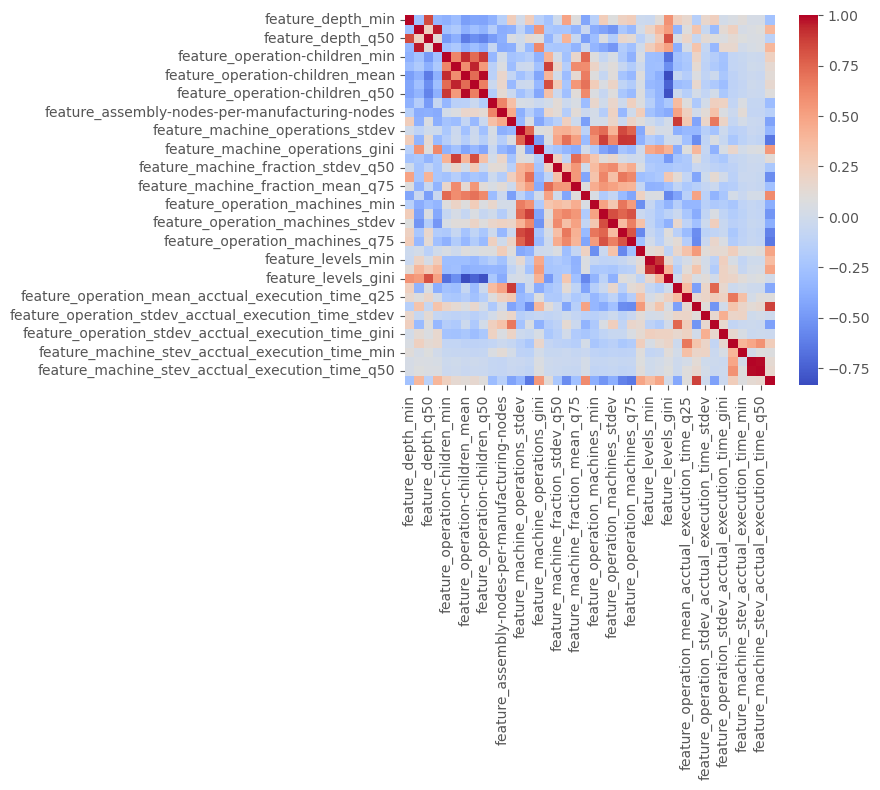

In [63]:
corr = data.loc[:, data.columns != 'Instances'].corr()

sns.heatmap(corr, vmax=1, square=True, annot=False, cmap='coolwarm')#, cmap='cubehelix')
# corr.annot = False
# corr.style.background_gradient(cmap='coolwarm')

In [40]:
RANKS_PATH='../datasets/results/relative_performance/runTime_1min_sa_ts/'
RANKS_PATH='../datasets/results/forLehmerCode/runTime_1min_sa_ts/'
ranks = read_output(prefix="relative_performance", sufix='_1min_8alg', dir_path = RANKS_PATH)
d={}
for column in ranks.columns:
    if column == 'Problem':
        d[column] = 'Instances'
    else:
        d[column]= f'algo_{column}'
ranks = ranks.rename(columns=d)
ranks

,Instances,algo_TS-Ei-LM,algo_SA-Ei-LM,algo_TSL-Ei-LM,algo_SAL-Ei-LM,algo_TS-Si-LM,algo_SA-Si-LM,algo_TSL-Si-LM,algo_SAL-Si-LM
0,bom_deep_10_3_10_5_No1,d>b>f>h>c>a>g>e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bom_deep_10_3_10_5_No2,a>d>b>c>f>h>g>e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bom_deep_10_3_15_5_No1,b>h>d>f>a>c>e>g,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bom_deep_10_3_15_5_No2,d>f>h>b>a>c>e>g,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bom_deep_10_5_10_5_No1,d>b>c>g>a>h>f>e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
291,YFJS16,d>b>f>h>g>e>c>a,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,YFJS17,b>d>f>h>g>c>a>e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,YFJS18,b>d>h>f>g>c>a>e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,YFJS19,b>d>c>f>h>g>a>e,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
merge =  pd.merge(data, ranks, on="Instances")
merge

,feature_depth_min,feature_depth_stdev,feature_depth_q50,feature_depth_gini,feature_operation-children_min,feature_operation-children_max,feature_operation-children_mean,feature_operation-children_stdev,feature_operation-children_q50,feature_operation-children_gini,...,feature_machine_stev_acctual_execution_time_gini,Instances,algo_TS-Ei-LM,algo_SA-Ei-LM,algo_TSL-Ei-LM,algo_SAL-Ei-LM,algo_TS-Si-LM,algo_SA-Si-LM,algo_TSL-Si-LM,algo_SAL-Si-LM
0,11,0.000000,11.0,2.583792e-17,1,2,1.100000,0.303822,1.0,0.081818,...,0.141831,bom_deep_10_3_10_5_No1,d>b>f>h>c>a>g>e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,0.000000,11.0,2.583792e-17,1,2,1.100000,0.303822,1.0,0.081818,...,0.333858,bom_deep_10_3_10_5_No2,a>d>b>c>f>h>g>e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,0.000000,11.0,2.583792e-17,1,2,1.100000,0.303822,1.0,0.081818,...,0.250120,bom_deep_10_3_15_5_No1,b>h>d>f>a>c>e>g,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,0.000000,11.0,2.583792e-17,1,2,1.100000,0.303822,1.0,0.081818,...,0.165237,bom_deep_10_3_15_5_No2,d>f>h>b>a>c>e>g,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,0.000000,11.0,4.128777e-17,1,4,1.354582,0.614015,1.0,0.196526,...,0.093445,bom_deep_10_5_10_5_No1,d>b>c>g>a>h>f>e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,3,5.296978,10.5,2.760417e-01,1,24,1.110048,1.590943,1.0,0.098664,...,0.088552,YFJS16,d>b>f>h>g>e>c>a,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,3,5.239018,11.0,2.740970e-01,1,31,1.109890,1.815683,1.0,0.098647,...,0.072687,YFJS17,b>d>f>h>g>c>a>e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,3,4.884411,11.5,2.491968e-01,1,30,1.106227,1.755160,1.0,0.095675,...,0.065424,YFJS18,b>d>h>f>g>c>a>e,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,4,4.112661,11.0,2.149894e-01,1,31,1.109890,1.815683,1.0,0.098647,...,0.069837,YFJS19,b>d>c>f>h>g>a>e,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
merge = merge.drop(columns=['Instances'])#,'feature_operation_stdev_acctual_execution_time_min','feature_operation-children_min','feature_operation-children_q25'])
merge.to_csv('../datasets/results/scampml-lehmer-fs-k-standard.csv',index=False)

In [ ]:
merge.isna().sum().sort_values(ascending = False)

In [25]:
cols = merge.columns[merge.isna().any()].tolist()
cols

['algo_SA-Ei-LM',
 'algo_TSL-Ei-LM',
 'algo_SAL-Ei-LM',
 'algo_TS-Si-LM',
 'algo_SA-Si-LM',
 'algo_TSL-Si-LM',
 'algo_SAL-Si-LM']

In [26]:
def identify_columns_with_constant_values(data_frame, error=0.00000000001):
    """
    Verifies if in the  data_frame exists column(s) with similar values
    param: data_frame: the  dataframe
    param: error: two values are considered equal if the absolute value of the difference is < error
    return: a list with columns names that contantain similar values 
    """
    columnsNameList = []
    for col_name in data_frame.columns:
        #print("col_name", col_name)
        col = np.array(data_frame[col_name])
        val = col[0]
        constant_value = True
        for el in col:
            if col_name == 'quantityTotal':
                #print(el,val, type(el), type(val), isinstance(el, str), isinstance(val, str))
                if isinstance(el, str):
                    el=int(el,16)
                if isinstance(val, str):
                    val=int(val,16)
            if abs(el - val) > error:
                constant_value = False
        if constant_value:
            columnsNameList.append(col_name)
    
    return columnsNameList

In [27]:
identify_columns_with_constant_values(merge.iloc[:,1:])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [28]:
scalerMinMax = MinMaxScaler().fit(merge.iloc[:,1:])
merge.iloc[:,1:] = scalerMinMax.transform(merge.iloc[:,1:])
merge.to_csv('../datasets/results/matilda-scampml.csv',index=False)

ValueError: could not convert string to float: 'd>b>f>h>c>a>g>e'